# MNIST: Dimensionality Reduction using PCA

## Random Forest: Without PCA

Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

Split features and target

In [2]:
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

Split training and test sets

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train.shape, y_train.shape 
X_test.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

Train a random forest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(random_state=42)
%time rnd_clf.fit(X_train, y_train)

CPU times: total: 18.7 s
Wall time: 34.9 s


RandomForestClassifier(random_state=42)

Evaluate the model on test set

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<AxesSubplot: >

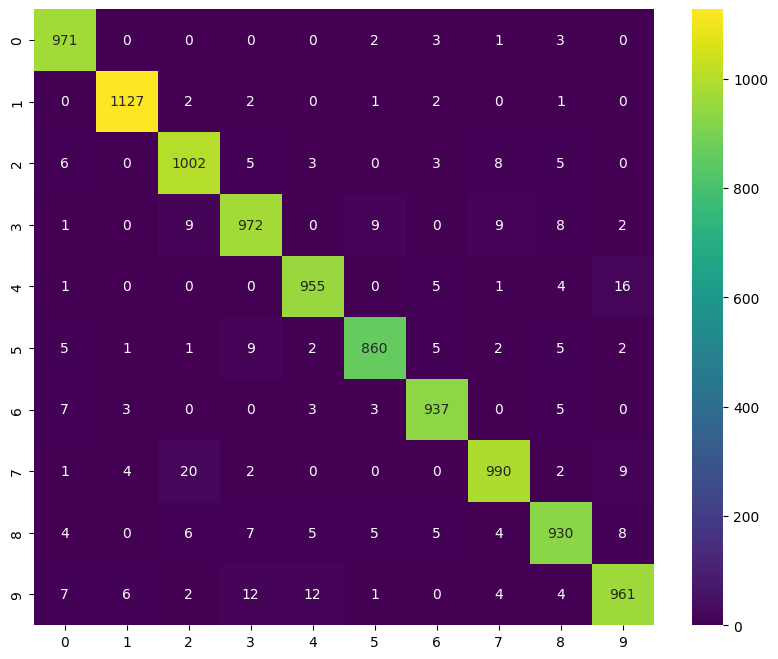

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = rnd_clf.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='viridis')

## Random Forest: With PCA

Reduce the dimensions using PCA

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

Train the random forest classifier with reduced dimensionality of X_train

In [11]:
rnd_clf_pca = RandomForestClassifier(random_state=42)
%time rnd_clf_pca.fit(X_train_reduced, y_train)

CPU times: total: 44.9 s
Wall time: 1min 27s


RandomForestClassifier(random_state=42)

Evaluate the model using reduced dimensionality test set

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.92      0.94      0.93      1010
           4       0.94      0.95      0.95       982
           5       0.94      0.93      0.94       892
           6       0.95      0.97      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



<AxesSubplot: >

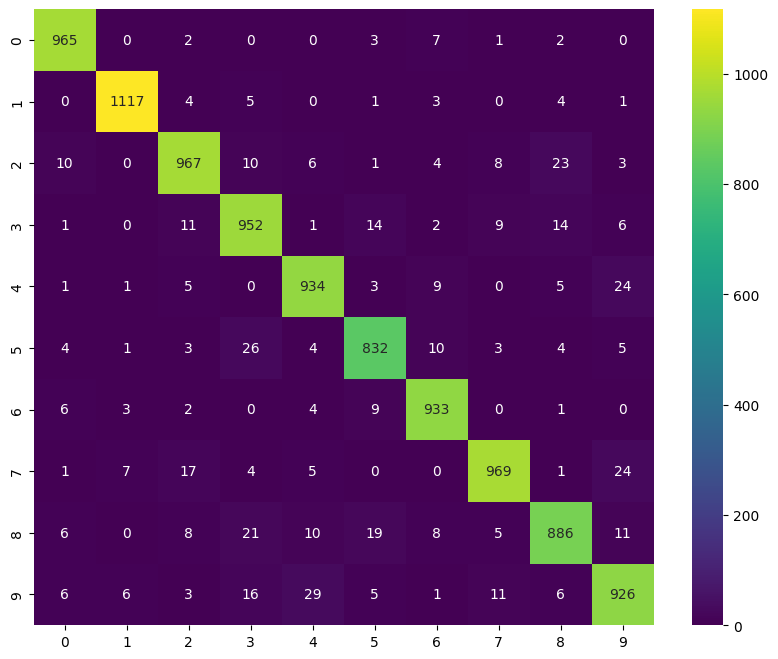

In [12]:
# evaluate
X_test_reduced = pca.transform(X_test)

y_pred_pca = rnd_clf_pca.predict(X_test_reduced)
print(classification_report(y_test, y_pred_pca))

cm_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap='viridis')

## SGDClassifier: Without PCA

Train SGDClassifier model

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: total: 1min 5s
Wall time: 2min 12s


SGDClassifier(random_state=42)

Evaluate the model using test set

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.97      0.96      0.97      1135
           2       0.93      0.78      0.85      1032
           3       0.78      0.92      0.84      1010
           4       0.96      0.79      0.87       982
           5       0.86      0.79      0.83       892
           6       0.96      0.89      0.93       958
           7       0.93      0.89      0.91      1028
           8       0.65      0.90      0.75       974
           9       0.84      0.87      0.86      1009

    accuracy                           0.87     10000
   macro avg       0.89      0.87      0.87     10000
weighted avg       0.89      0.87      0.88     10000



<AxesSubplot: >

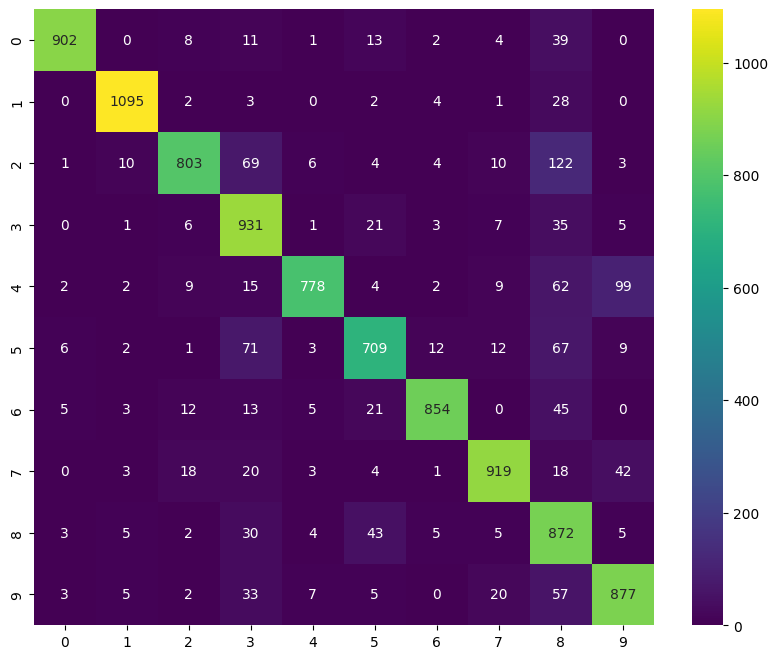

In [14]:
y_pred_sgd = sgd_clf.predict(X_test)
print(classification_report(y_test, y_pred_sgd))

cm = confusion_matrix(y_test, y_pred_sgd)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='viridis')

## SGDClassifier: With PCA

Train the model using reduced dimensionality of X_train

In [15]:
sgd_clf_pca = SGDClassifier(random_state=42)
%time sgd_clf_pca.fit(X_train_reduced, y_train)

CPU times: total: 11.6 s
Wall time: 25.2 s


SGDClassifier(random_state=42)

Evaluate the model on the test set

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.90      0.89      0.89      1032
           3       0.90      0.88      0.89      1010
           4       0.90      0.92      0.91       982
           5       0.88      0.81      0.84       892
           6       0.90      0.95      0.93       958
           7       0.88      0.90      0.89      1028
           8       0.84      0.84      0.84       974
           9       0.85      0.83      0.84      1009

    accuracy                           0.90     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.90      0.90      0.90     10000



<AxesSubplot: >

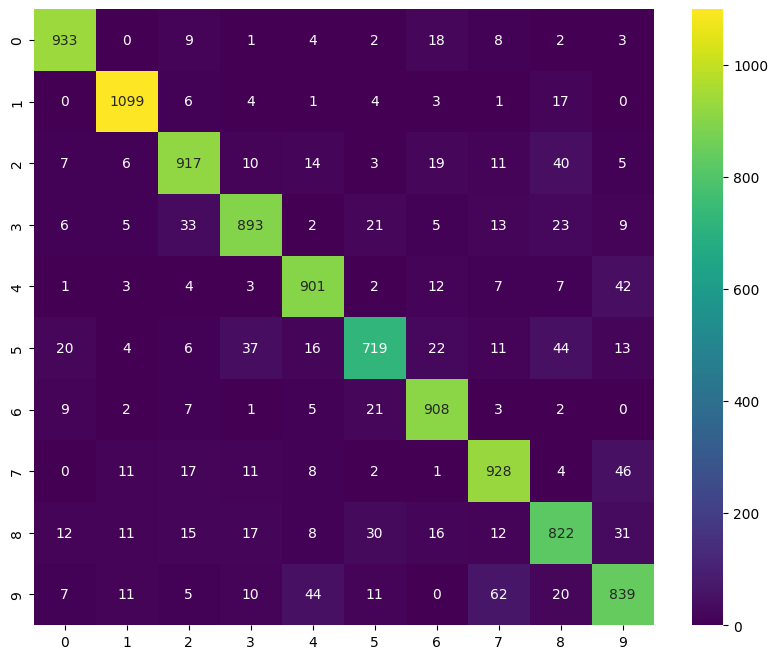

In [16]:
y_pred_sgd_pca = sgd_clf_pca.predict(X_test_reduced)
print(classification_report(y_test, y_pred_sgd_pca))

cm_pca = confusion_matrix(y_test, y_pred_sgd_pca)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_pca, annot=True, fmt="d", cmap='viridis')